### Задание

1. Взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
2. Сделать обзорный анализ выбранного датасета
3. Обучить любой классификатор (какой вам нравится)
4. разобраться с SHAP и построить важности признаков для:
всего тестового набора данных (summary_plot - дать интерпретацию)
для 5 случайных объектов из тестового набора

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("Student_Behaviour.csv")
df

,"Have you completed any certification courses, or are you currently enrolled in any?",Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,possibility of choosing their career based on their degree :,social medai & video games spending Time,Travelling Time,Stress Level,Financial Status,Are you doing a part-time job right now?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Yes,Male,B.com ISM,170.0,76.0,72.0,67.0,65.0,Video Games,30 - 60 minute,Morning,7000,Yes,50%,More than 2 hour,30 - 60 minutes,Bad,Bad,No
231,Yes,Male,B.com ISM,172.0,52.0,72.0,70.0,76.0,Cinema,2 - 3 hour,Anytime,25000,Yes,75%,30 - 60 Minute,30 - 60 minutes,Good,good,No
232,Yes,Female,BCA,139.0,33.0,90.0,75.0,70.0,Cinema,30 - 60 minute,Night,20000,Yes,50%,30 - 60 Minute,2.30 - 3 hour,Bad,good,No
233,Yes,Female,Commerce,153.0,58.0,85.0,74.0,75.0,Cinema,0 - 30 minute,Anytime,20000,Yes,75%,More than 2 hour,2.30 - 3 hour,Awful,good,No


Заменим значения "Yes" и "No" на бинарные значения 1 и 0 соответственно

In [4]:
for col in ['Have you completed any certification courses, or are you currently enrolled in any?', 'Do you like your degree?', 'Are you doing a part-time job right now?']:
    df[col] = df[col].map({'Yes': 1, 'No': 0})
df.head()

,"Have you completed any certification courses, or are you currently enrolled in any?",Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,possibility of choosing their career based on their degree :,social medai & video games spending Time,Travelling Time,Stress Level,Financial Status,Are you doing a part-time job right now?
0,0,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,0,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,0
1,0,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,1,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,0
2,1,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,1,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,0
3,1,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,0,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,0
4,0,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,1,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   Have you completed any certification courses, or are you currently enrolled in any?  235 non-null    int64  
 1   Gender                                                                               235 non-null    object 
 2   Department                                                                           235 non-null    object 
 3   Height(CM)                                                                           235 non-null    float64
 4   Weight(KG)                                                                           235 non-null    float64
 5   10th Mark                                                                            235 non

Набор данных содержит 19 столбцов, включая 18 признаков и 1 целевую переменную 10 признаков представляют собой переменную типа str, 5 float64 и 4 int64

In [6]:
#числовые признаки
num_cols=df.select_dtypes(include=np.number).columns.tolist()
# категориальные признаки
cat_cols=df.select_dtypes(object).columns.tolist()
print(f'Числовых признаков {len(num_cols)}, а именно:\n{num_cols}\n'
     f'\nКатегориальных признаков {len(cat_cols)}, а именно:\n{cat_cols}')

Числовых признаков 9, а именно:
['Have you completed any certification courses, or are you currently enrolled in any?', 'Height(CM)', 'Weight(KG)', '10th Mark', '12th Mark', 'college mark', 'salary expectation', 'Do you like your degree?', 'Are you doing a part-time job right now?']

Категориальных признаков 10, а именно:
['Gender', 'Department', 'hobbies', 'daily studing time', 'prefer to study in', 'possibility of choosing  their career based on their degree : ', 'social medai & video games spending Time', 'Travelling Time ', 'Stress Level ', 'Financial Status']


In [7]:
df.isnull().sum()

Have you completed any certification courses, or are you currently enrolled in any?    0
Gender                                                                                 0
Department                                                                             0
Height(CM)                                                                             0
Weight(KG)                                                                             0
10th Mark                                                                              0
12th Mark                                                                              0
college mark                                                                           0
hobbies                                                                                0
daily studing time                                                                     0
prefer to study in                                                                     0
salary expectation   

Пропусков нет

### EDA

#### Категориальные признаки

In [8]:
print(f'{len(cat_cols)} категориальных признаков\n{cat_cols}\n')
# Extract details on categorical features
for i in cat_cols:
    unique_no = df[i].nunique()
    unique_name = df[i].unique().tolist()
    print(f'{i}, имеет {unique_no} уникальнх значения:\n{unique_name}\n')
    

10 категориальных признаков
['Gender', 'Department', 'hobbies', 'daily studing time', 'prefer to study in', 'possibility of choosing  their career based on their degree : ', 'social medai & video games spending Time', 'Travelling Time ', 'Stress Level ', 'Financial Status']

Gender, имеет 2 уникальнх значения:
['Male', 'Female']

Department, имеет 4 уникальнх значения:
['BCA', 'Commerce', 'B.com Accounting and Finance ', 'B.com ISM']

hobbies, имеет 4 уникальнх значения:
['Video Games', 'Cinema', 'Reading books', 'Sports']

daily studing time, имеет 6 уникальнх значения:
['0 - 30 minute', '30 - 60 minute', '1 - 2 Hour', '2 - 3 hour', '3 - 4 hour', 'More Than 4 hour']

prefer to study in, имеет 3 уникальнх значения:
['Morning', 'Anytime', 'Night']

possibility of choosing  their career based on their degree : , имеет 5 уникальнх значения:
['50%', '75%', '25%', '100%', '0%']

social medai & video games spending Time, имеет 6 уникальнх значения:
['1.30 - 2 hour', '1 - 1.30 hour', 'More th

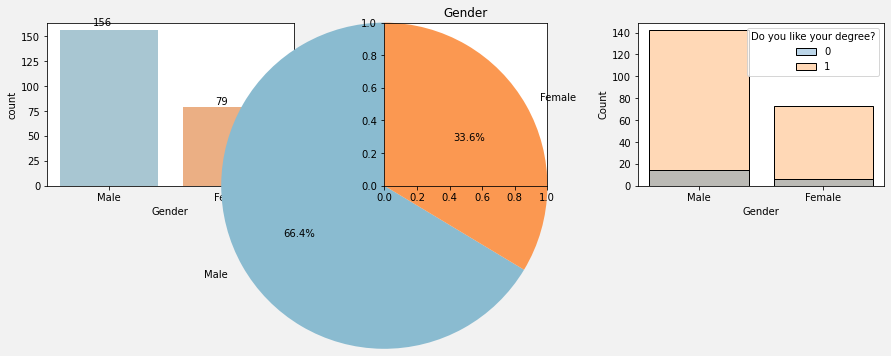

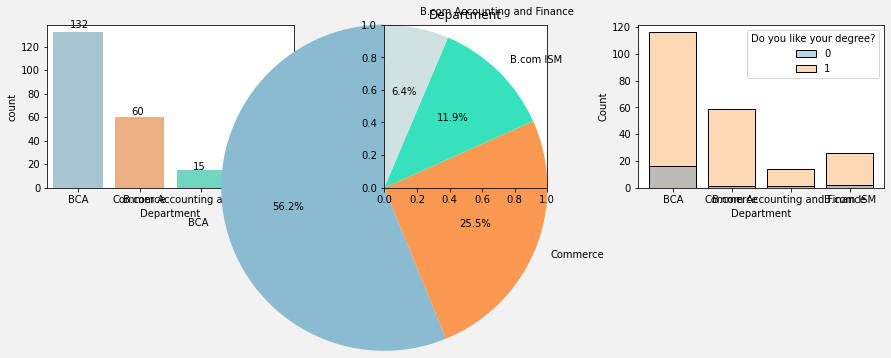

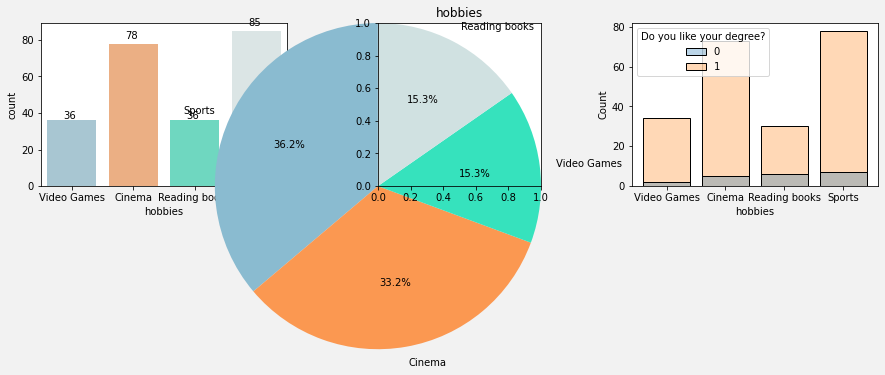

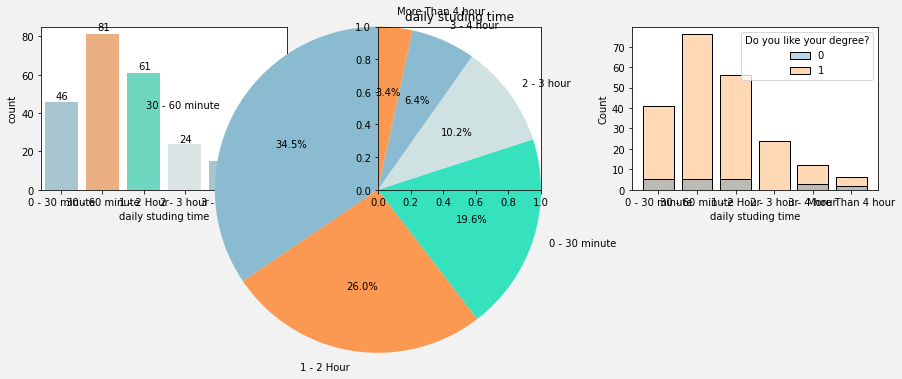

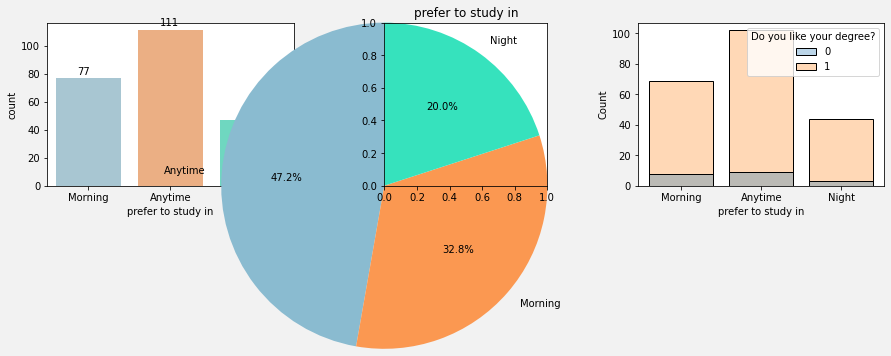

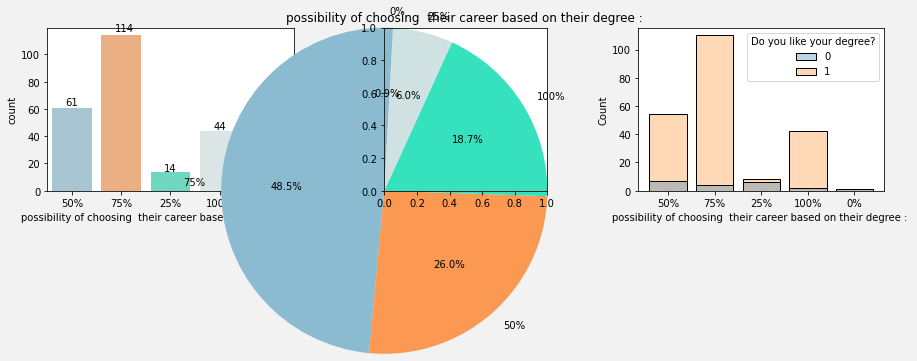

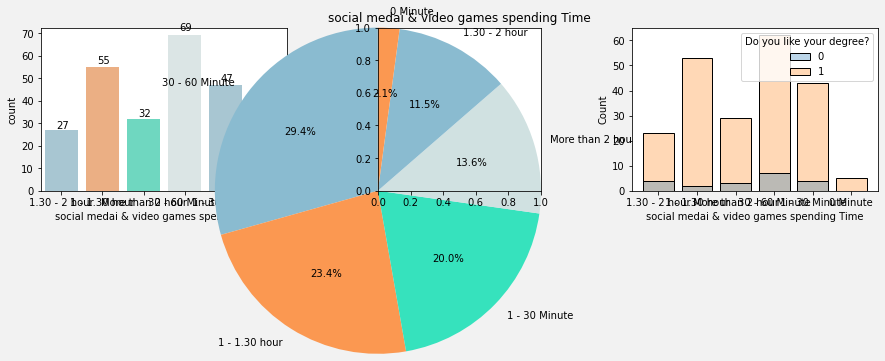

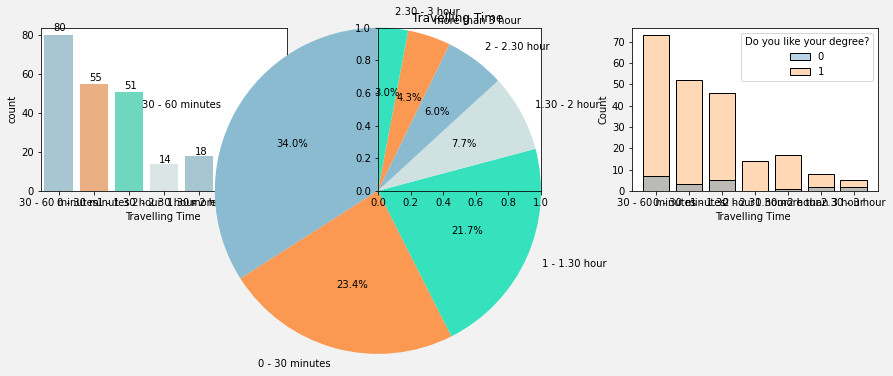

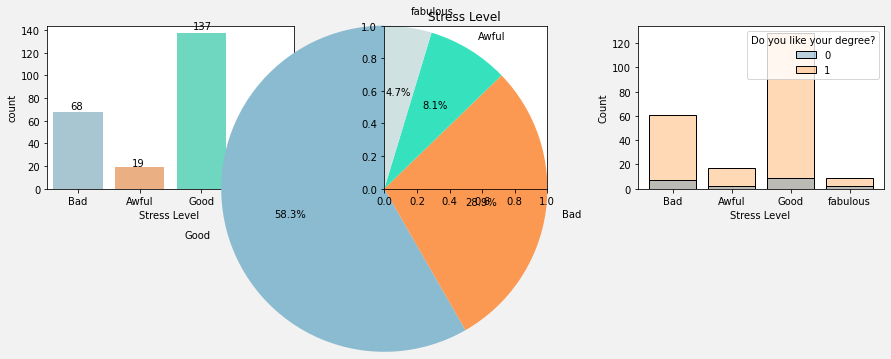

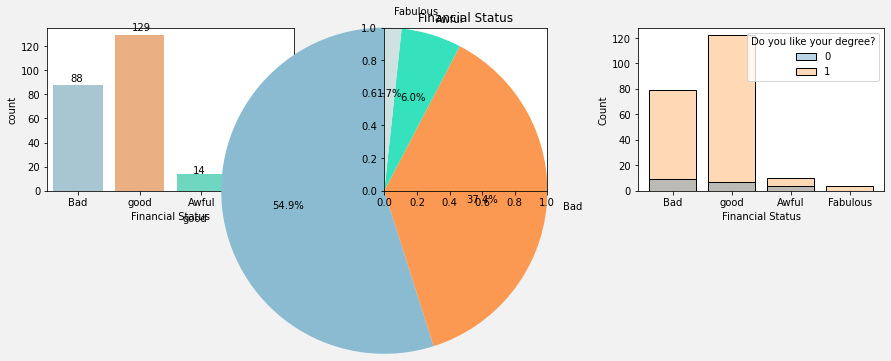

In [9]:
# Summary of categorical data
palette = ['#8abbd0', '#FB9851', '#36E2BD','#D0E1E1']

for feature in cat_cols:
    fig, ax = plt.subplots(1,3, figsize=(15,3))
    fig.patch.set_facecolor('#F2F2F2')

    sns.countplot(x=df[feature], data=df, ax=ax[0], palette=palette, alpha=0.8)
    for p, label in zip(ax[0].patches, df[feature].value_counts().index):
        ax[0].annotate(p.get_height(), (p.get_x()+p.get_width()/3, p.get_height()*1.03))
                    
    df[feature].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=ax[1], colors=palette, frame=True)
    ax[1].set_ylabel('')
    ax[1].set_title(feature)

    sns.histplot(x=feature,data=df, hue='Do you like your degree?',ax=ax[2], alpha=0.3, shrink=.8)  
    
plt.tight_layout
plt.show()

#### Числовые признаки

In [10]:
df.describe()

,"Have you completed any certification courses, or are you currently enrolled in any?",Height(CM),Weight(KG),10th Mark,12th Mark,college mark,salary expectation,Do you like your degree?,Are you doing a part-time job right now?
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,2.350000e+02,235.000000,235.000000
mean,0.646809,157.402128,60.803830,76.842128,68.780128,70.660553,3.248168e+04,0.914894,0.174468
std,0.478982,21.510805,14.895844,13.050800,11.016533,15.727446,1.113146e+05,0.279636,0.380322
min,0.000000,4.500000,20.000000,7.400000,45.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,152.000000,50.000000,70.000000,60.000000,60.000000,1.500000e+04,1.000000,0.000000
50%,1.000000,160.000000,60.000000,80.000000,69.000000,70.000000,2.000000e+04,1.000000,0.000000
75%,1.000000,170.000000,70.000000,86.250000,76.000000,80.000000,2.500000e+04,1.000000,0.000000
max,1.000000,192.000000,106.000000,98.000000,94.000000,100.000000,1.500000e+06,1.000000,1.000000


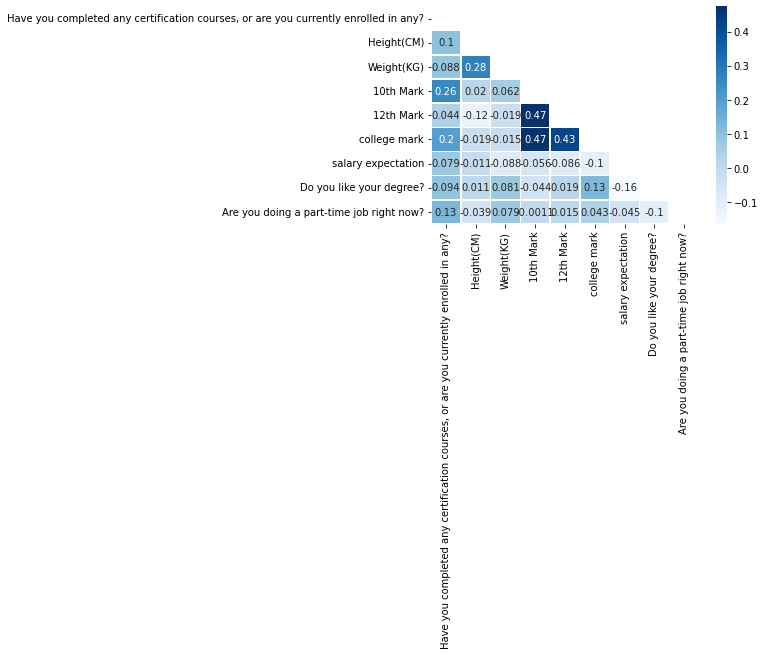

In [11]:
fig = plt.figure(figsize=(6,4)) 
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), cmap='Blues', annot=True, mask=mask, linewidth=0.5)
plt.show()

Корреляция между признаками невысокая

c:\users\vasiliybarovlaptop\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


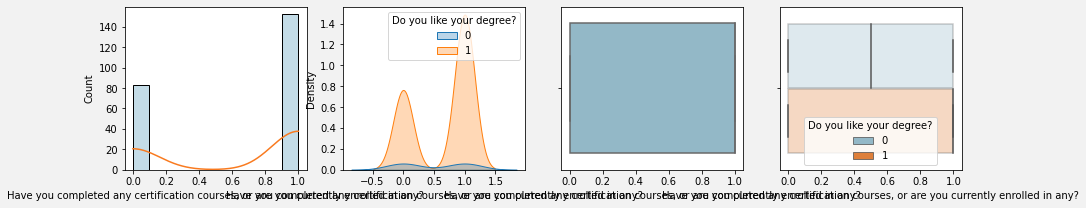

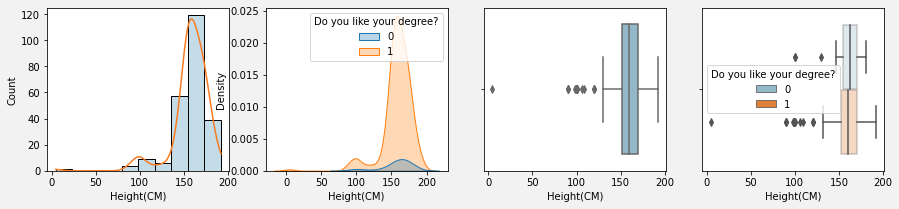

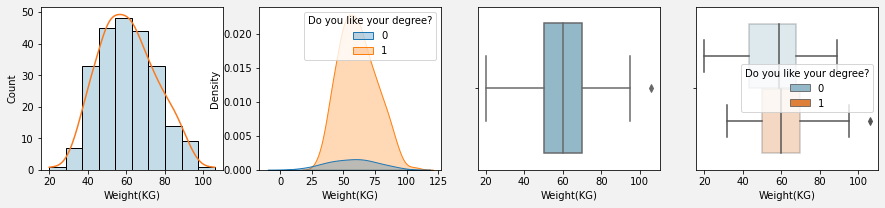

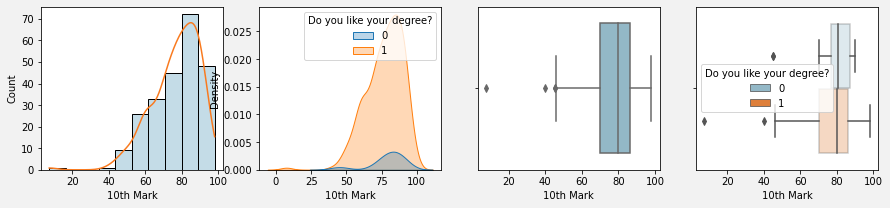

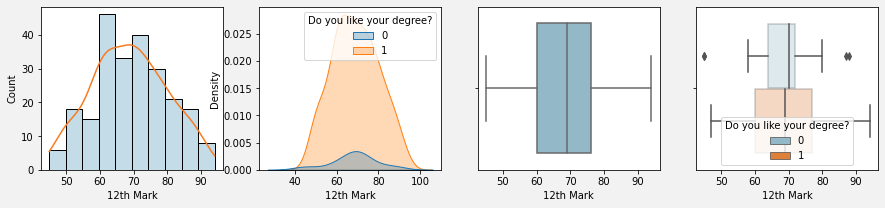

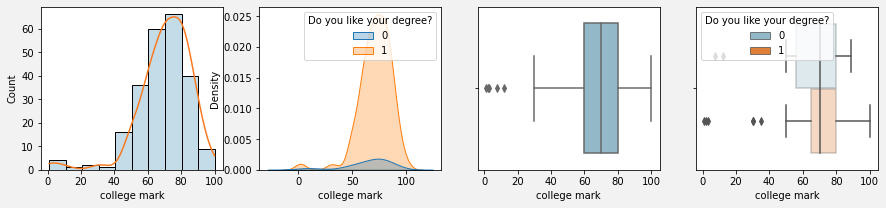

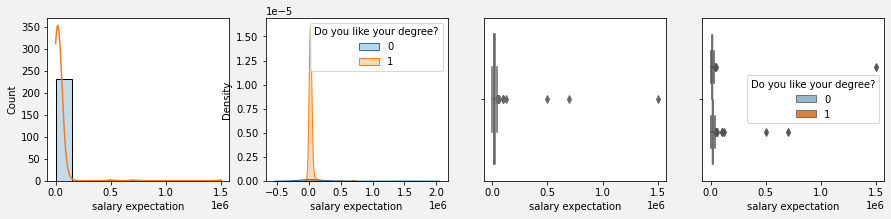

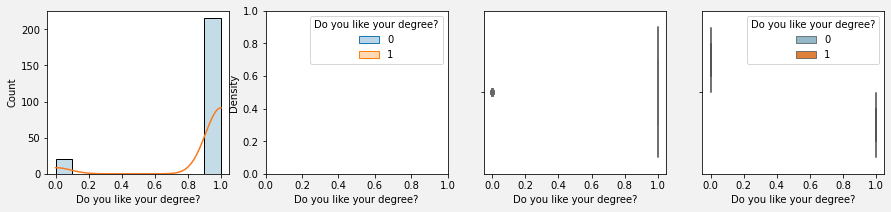

In [13]:
# Plots on numerical features to check data quality and data distribution
color ='#8abbd0'

for i in num_cols[:-1]:
    fig, ax = plt.subplots(1,4, figsize=(15,3))
    fig.patch.set_facecolor( '#F2F2F2')
    sns.histplot(df[i], bins=10, ax=ax[0],  color=color, kde=True)
    ax[0].lines[0].set_color('#F97A1F')
    sns.kdeplot(x=i,data=df, hue='Do you like your degree?',ax=ax[1],shade=True, alpha=0.3)
    sns.boxplot(x=i, data=df,ax=ax[2], color=color)
    sns.boxplot(x=i, data=df, hue='Do you like your degree?',y=[""]*len(df),ax=ax[3],palette=['#8abbd0','#F97A1F'],boxprops=dict(alpha=.3))
    plt.tight_layout
plt.show()

### Pipeline

In [16]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score, precision_recall_curve
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

import shap
shap.initjs()

import warnings
warnings.filterwarnings('ignore')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Do you like your degree?' ], axis = 1), df['Do you like your degree?'], test_size=0.3, random_state=7)

In [18]:
continuous_columns = X_train.select_dtypes(include='number').columns.to_list()
categorical_columns = X_train.select_dtypes(exclude='number').columns.to_list()

In [19]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]
    

class NumberSelector(BaseEstimator, TransformerMixin):

    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key, drop_first=True).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key, drop_first=True)
        test_columns = [col for col in X.columns]
        
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]
    
class CatNaNInputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        
        self.frequent_constant = 'None'

    def fit(self, X, y=None):
        self.frequent_constant = X.mode()[0]
        return self

    def transform(self, X):
        X = X.fillna(self.frequent_constant)
        return X

class OneFeatureNaNInputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.flag = 9999

    def fit(self, X, y=None):

        return self

    def transform(self, X):
        X = X.fillna(self.flag)
        return X
    
class NumericPower(BaseEstimator, TransformerMixin):
    def __init__(self, key, p = 2):
        self.key = key
        self.columns = []
        self.p = p+1

    def fit(self, X, y=None):
        B = [self.key + str(i) for i in range(1, self.p)]
        self.columns = B + ['log']
        return self

    def transform(self, X):
        Xp = X.values.reshape(-1,1)
        for i in range(2, self.p):
            Xp = np.hstack([Xp,(X.values.reshape(-1,1) ** i).astype(float)])

        Xp = np.hstack([Xp, np.log(X.values.reshape(-1,1) + 1).astype(float)])    
        B = pd.DataFrame(data = Xp, index = X.index,columns =[self.columns] )
        return B[self.columns]     

In [20]:
final_transformers = list()

for cat_col in categorical_columns:
    cat_transformer = Pipeline([
                ('selector', FeatureSelector(column=cat_col)),
                ('nan_inputer', CatNaNInputer()),
                ('ohe', OHEEncoder(key=cat_col))
            ])
    
    final_transformers.append((cat_col, cat_transformer))
    
for cont_col in continuous_columns:
    cont_transformer = Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                
                ('NAN', SimpleImputer(strategy='median')),
                
        
                
            ])
    
    final_transformers.append((cont_col, cont_transformer))

In [21]:
feats = FeatureUnion(final_transformers)

feature_processing = Pipeline([('feats', feats)])

In [22]:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

In [23]:
weights = y_train.value_counts(normalize=True).to_dict()

In [24]:
model = RandomForestClassifier(random_state=7, class_weight = weights)

In [25]:
pipeline = Pipeline([
    ('features', feats),
    ('classifier', model)
])

In [26]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('Gender',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='Gender')),
                                                                 ('nan_inputer',
                                                                  CatNaNInputer()),
                                                                 ('ohe',
                                                                  OHEEncoder(key='Gender'))])),
                                                ('Department',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='Department')),
                                                                 ('nan_inputer',
                                                                  CatNaN

In [27]:
preds = pipeline.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, preds)

fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]:.3f}, Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')

Best Threshold=0.59, F-Score=0.963, Precision=0.929, Recall=1.000


### SHAP

In [28]:
df = pd.get_dummies(df, drop_first=True)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Do you like your degree?' ], axis = 1), df['Do you like your degree?'], test_size=0.3, random_state=7)

In [30]:
model = RandomForestClassifier(random_state=7)

In [31]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

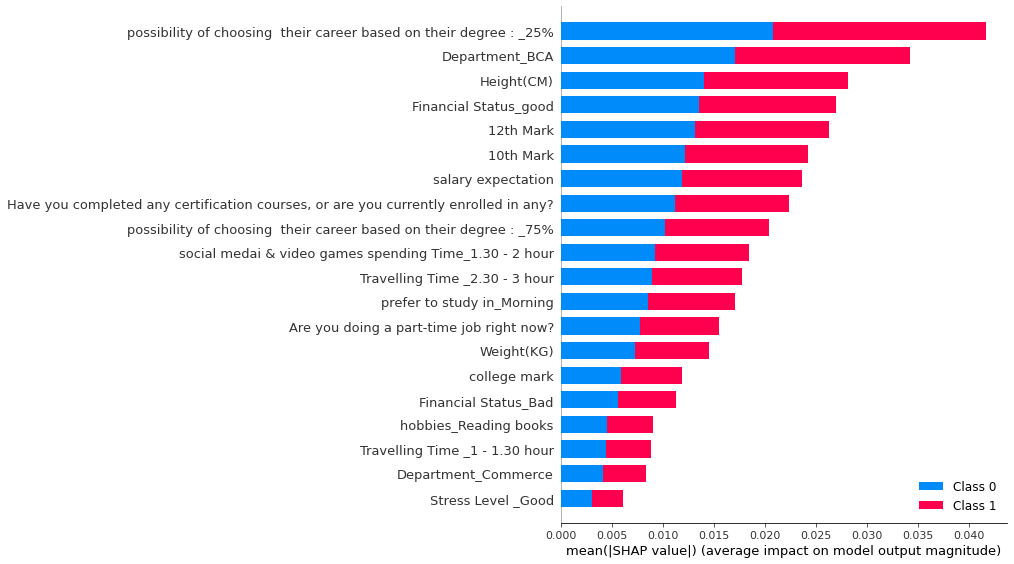

In [32]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

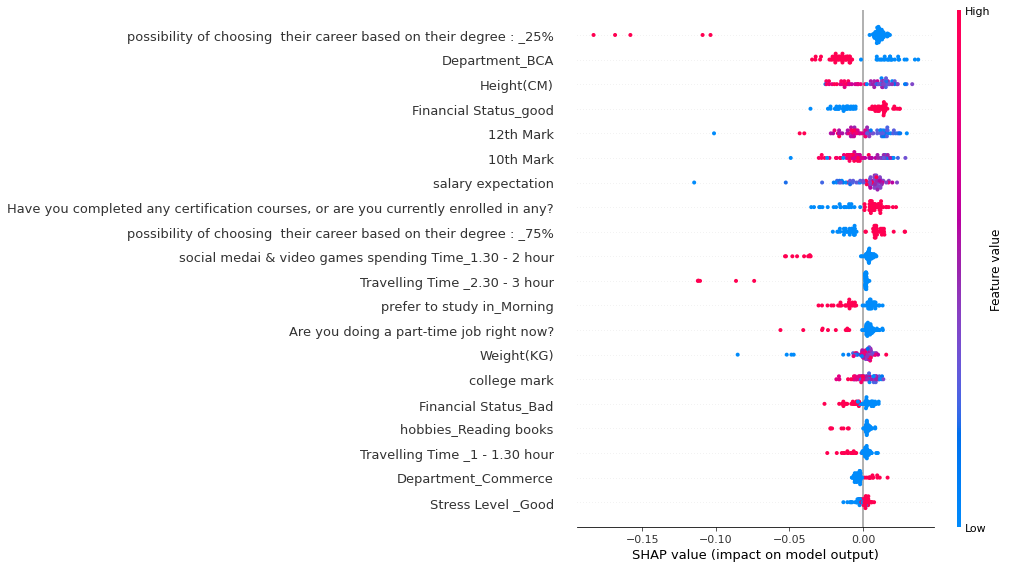

In [33]:
shap_values = shap_values[1]
shap.summary_plot(shap_values, X_test)

Из результатирующего графика можно сделать вывод:
- Хорошее финансовое состояние (Financal status: good) положительно влияет на удовлетворенность образованием;
- Факультет ВСА (Department_BCA) оказывает большее влияние на недовльство образованием;
- Дополнительное образование (курсы) (Have you completed any certification courses, or are you currently enrolled in any?	) повышают уровень удовлетворенности;
- Ожидание о будующей зарплате (salary expectation) положительно влияют на удовлетворенность образованием;
- Увлечение книгами (hobbies - reading books) оказывает не очень сильное влияние на удовлетворенность образованием

In [34]:
explainer = shap.TreeExplainer(model)
shap_values_all = explainer.shap_values(X_train)

In [35]:
expected_value = explainer.expected_value[1]
shap_values = shap_values_all[1]

In [36]:
shap.initjs()
idx = 1
shap.force_plot(expected_value, shap_values[idx], X_train.iloc[idx])

Хорошее финансовое положение сильно влияет на удовлетворенность образованием

In [37]:
shap.initjs()
idx = 10
shap.force_plot(expected_value, shap_values[idx], X_train.iloc[idx])

In [38]:
shap.initjs()
idx = 20
shap.force_plot(expected_value, shap_values[idx], X_train.iloc[idx])

In [39]:
shap.initjs()
idx = 30
shap.force_plot(expected_value, shap_values[idx], X_train.iloc[idx])

In [40]:
shap.initjs()
idx = 40
shap.force_plot(expected_value, shap_values[idx], X_train.iloc[idx])